ISS (国際宇宙ステーション) の TLE を取得する。


In [1]:
import requests

response = requests.get("https://celestrak.org/NORAD/elements/gp.php?CATNR=25544&FORMAT=2LE")
iss_tle = response.text.rstrip().split("\r\n")
iss_tle

['1 25544U 98067A   24219.12402954  .00017877  00000+0  32397-3 0  9991',
 '2 25544  51.6401  67.9362 0006169 166.0815 288.9946 15.49680634466290']

SGP4 で 2024-08-07T09:16:00Z から 10 秒ごと 5 分間の ECI 座標系における位置を計算する。


In [2]:
from datetime import datetime, timedelta
from sgp4.conveniences import jday_datetime
from sgp4.api import Satrec
import numpy as np

today = datetime(2024, 8, 7, 9, 16)
steps = [today + timedelta(seconds=i) for i in range(0, 300, 10)]
jd, fr = np.frompyfunc(jday_datetime, 1, 2)(steps)
iss = Satrec.twoline2rv(*iss_tle)
errors, positions, _velocities = iss.sgp4_array(jd, fr)
assert np.all(errors == 0)
positions[:5]

array([[2533.8067698 , 6274.71547492,  665.74111802],
       [2487.15946013, 6286.67451789,  725.28161072],
       [2440.19637542, 6297.83539582,  784.72975739],
       [2392.92347058, 6308.1966721 ,  844.07798638],
       [2345.34674032, 6317.7570121 ,  903.31873846]])

緯度・経度に変換する。


In [3]:
from pymap3d import eci2geodetic

lats, lons, _alts = eci2geodetic(*(positions.T * 1000), t=steps)
lats[:5], lons[:5]

(array([5.65398716, 6.16153625, 6.66877872, 7.17568752, 7.68223544]),
 array([-27.37943171, -27.01669602, -26.65318522, -26.28883471,
        -25.92357951]))

地図上にプロットする。


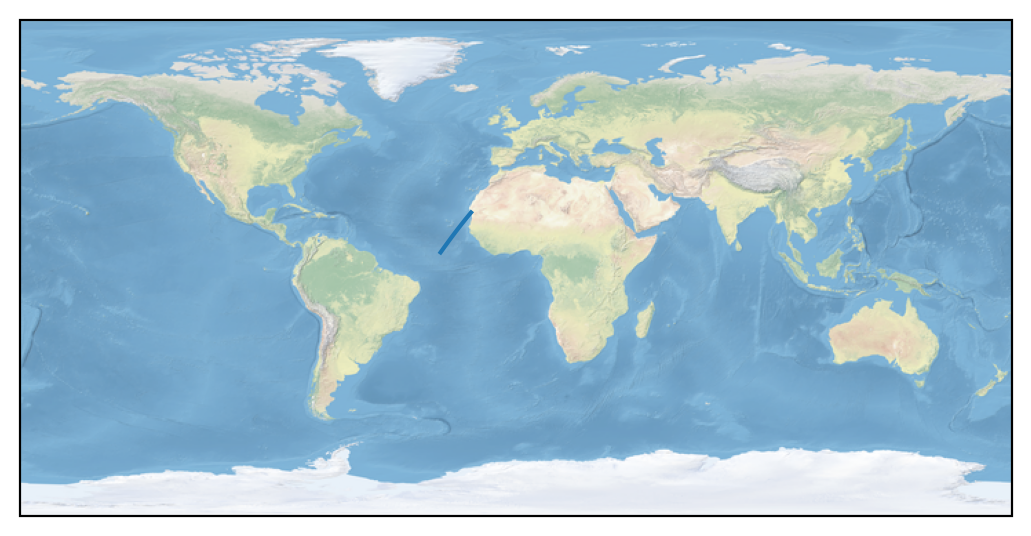

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
ax.stock_img()
ax.plot(lons, lats)